In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import warnings
import scipy

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data

In [6]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]
    lam = f['lam'][:]
    bulge_ratio = f['bulge_ratio'][:]
    ellipticity = f['ellipticity'][:]
    lambda_obs = f['lambda_obs'][:]

In [7]:
warnings.filterwarnings('ignore')

PSB_selection = (median_age<=1.2)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
intermediate_quiescent_selection = (median_age>1.2)&(median_age<=1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
old_quiescent_selection = (median_age>1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
starforming_selection = np.where(np.log10(newbin_current_SFR/10**(total_mass))>-10.5)[0]

In [8]:
#data for seeded 80 random star-forming galaxies
np.random.seed(0)
subselection = np.random.choice(starforming_selection, 80, replace=False)

In [9]:
print(lambda_obs)

[0.05056998 0.57924101 0.57716793 ... 0.71902509 0.54023154 0.56190291]


Lambda vs Mass and Bulge Ratio vs Mass

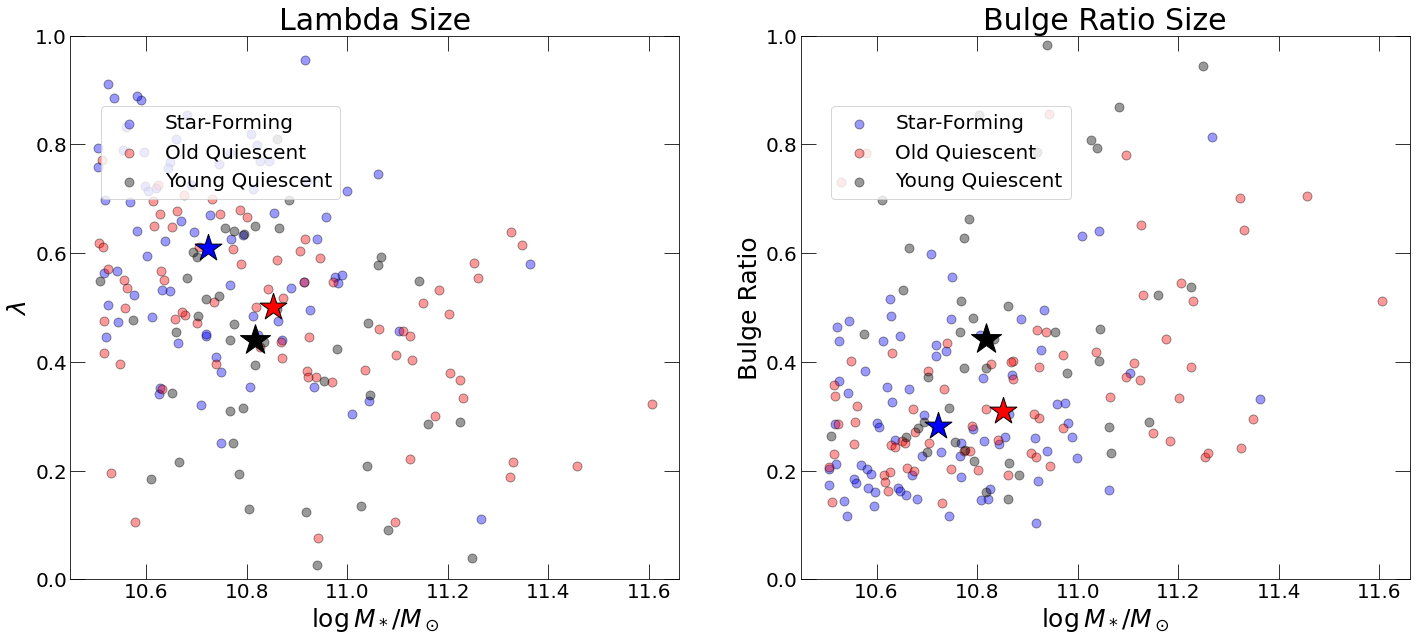

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')

ax1.scatter(total_mass[subselection], lam[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax1.scatter((total_mass[old_quiescent_selection]), lam[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax1.scatter((total_mass[PSB_selection]), lam[PSB_selection], c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax1.scatter(np.median(total_mass[subselection]), np.median(lam[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(total_mass[old_quiescent_selection]), np.median(lam[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(total_mass[PSB_selection]), np.median(lam[PSB_selection]), c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax1.legend(loc=(0.05, 0.7), fontsize=20, frameon=True)
ax1.set_ylim(0, 1)
#ax1.set_xlim(10.45, 11.7)
ax1.set_xlabel('$\log \, M_*/M_\odot$', fontsize=25)
ax1.set_ylabel('$\lambda$', fontsize=25)
ax1.set_yscale('linear')
ax1.set_title('Lambda Size', fontsize=30)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


ax2.scatter(total_mass[subselection], bulge_ratio[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax2.scatter((total_mass[old_quiescent_selection]), bulge_ratio[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax2.scatter((total_mass[PSB_selection]), bulge_ratio[PSB_selection], c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax2.scatter(np.median(total_mass[subselection]), np.median(bulge_ratio[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[old_quiescent_selection]), np.median(bulge_ratio[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[PSB_selection]), np.median(bulge_ratio[PSB_selection]), c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax2.legend(loc=(0.05, 0.7), fontsize=20, frameon=True)
ax2.set_ylim(0, 1)
#ax2.set_xlim(10.45, 11.7)
ax2.set_xlabel('$\log \, M_*/M_\odot$', fontsize=25)
ax2.set_ylabel('Bulge Ratio', fontsize=25)
ax2.set_yscale('linear')
ax2.set_title('Bulge Ratio Size', fontsize=30)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=7)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

plt.savefig("Lambda_BR_vs_Mass.png",dpi=200)

Merger vs Nonmerger for Lambda vs Mass

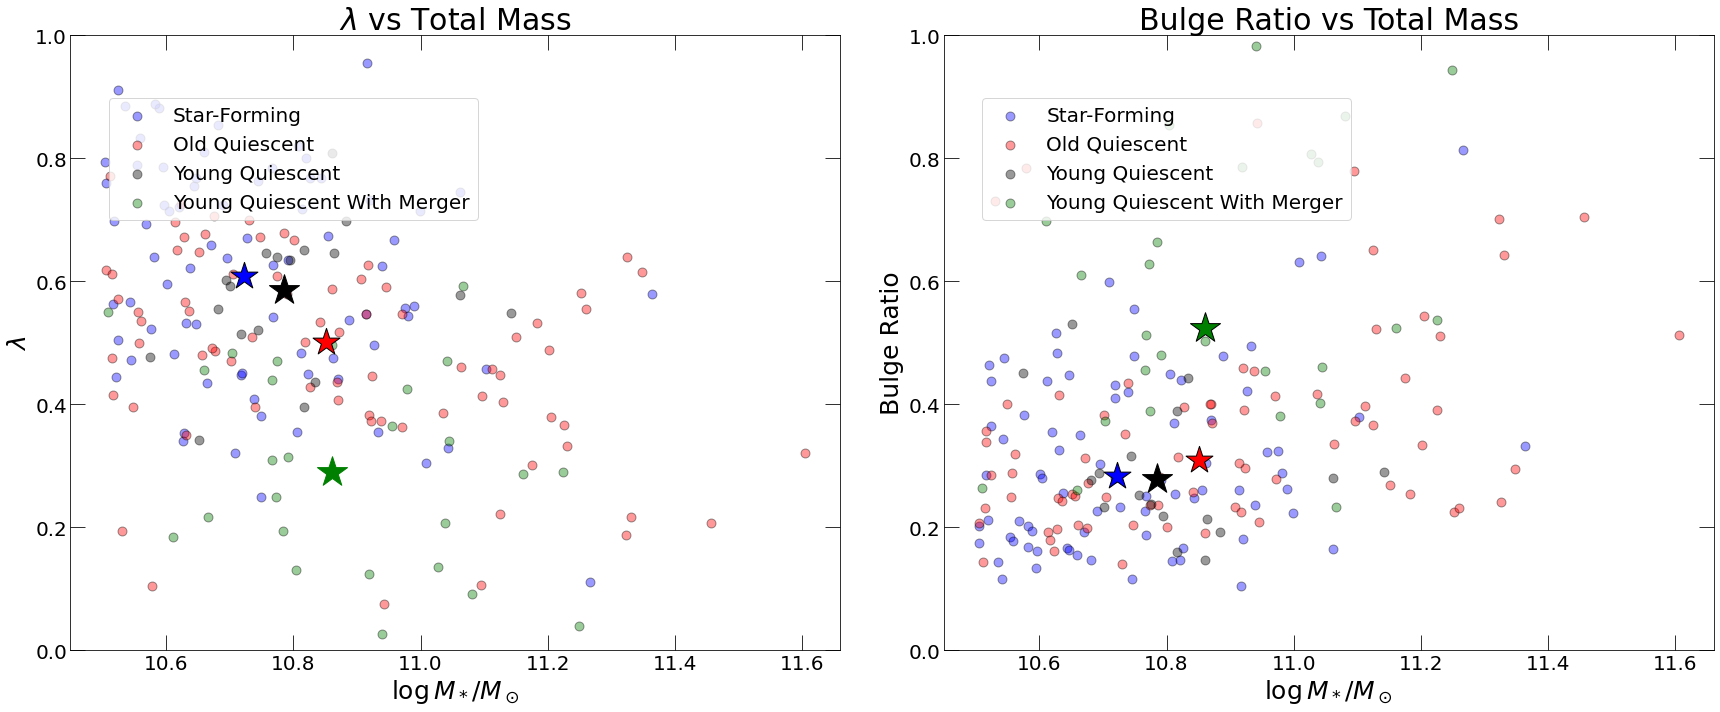

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
n_bins=50
redshift=2

#select young quiescent galaxies by merger cut-off
# had a significant prior merger 
PSB = (maximum_merger_ratio_30kpc_current_fraction>=0.1) & PSB_selection 
# had no significant prior merger
PSBm = (maximum_merger_ratio_30kpc_current_fraction<0.1) & PSB_selection 

#panel 1: young quiescent galaxies with mergers
ax1.scatter(total_mass[subselection], lam[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax1.scatter((total_mass[old_quiescent_selection]), lam[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax1.scatter((total_mass[PSBm]), lam[PSBm], c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax1.scatter((total_mass[PSB]), lam[PSB], c='g', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent With Merger')
ax1.scatter(np.median(total_mass[subselection]), np.median(lam[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(total_mass[old_quiescent_selection]), np.median(lam[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(total_mass[PSBm]), np.median(lam[PSBm]), c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax1.scatter(np.median(total_mass[PSB]), np.median(lam[PSB]), c='green', s=1000, edgecolors='green', marker='*', lw=1)

ax1.legend(loc=(0.05, 0.7), fontsize=20, frameon=True)
ax1.set_ylim(0, 1)
#ax1.set_xlim(10.45, 11.7)
ax1.set_xlabel('$\log \, M_*/M_\odot$', fontsize=25)
ax1.set_ylabel('$\lambda$', fontsize=25)
ax1.set_yscale('linear')
ax1.set_title('$\lambda$ vs Total Mass', fontsize=30)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

#panel 2: young quiescent galaxies without mergers
ax2.scatter(total_mass[subselection], bulge_ratio[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax2.scatter((total_mass[old_quiescent_selection]), bulge_ratio[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax2.scatter((total_mass[PSBm]), bulge_ratio[PSBm], c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax2.scatter((total_mass[PSB]), bulge_ratio[PSB], c='g', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent With Merger')
ax2.scatter(np.median(total_mass[subselection]), np.median(bulge_ratio[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[old_quiescent_selection]), np.median(bulge_ratio[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[PSBm]), np.median(bulge_ratio[PSBm]), c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax2.scatter(np.median(total_mass[PSB]), np.median(bulge_ratio[PSB]), c='green', s=1000, edgecolors='black', marker='*', lw=1)
ax2.legend(loc=(0.05, 0.7), fontsize=20, frameon=True)
ax2.set_ylim(0, 1)
ax2.set_xlabel('$\log \, M_*/M_\odot$', fontsize=25)
ax2.set_ylabel('Bulge Ratio', fontsize=25)
ax2.set_yscale('linear')
ax2.set_title('Bulge Ratio vs Total Mass', fontsize=30)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=7)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

f.tight_layout(w_pad=4, h_pad=10)

plt.savefig("Merger_plot.png",dpi=200)

Mass Fraction from Merger of Young Quiescent Galaxies

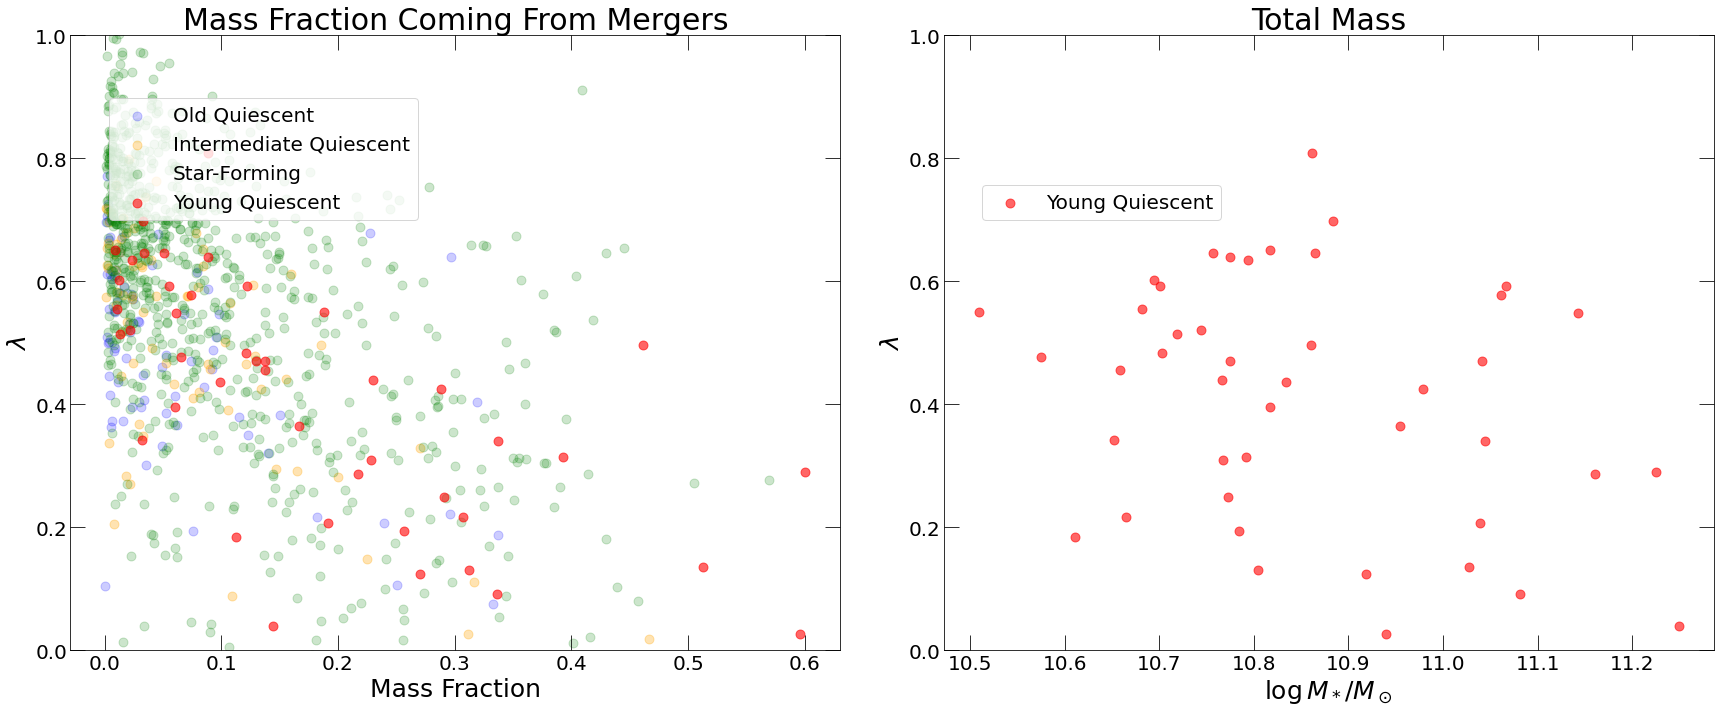

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
n_bins=50
redshift=2
old = (maximum_merger_ratio_30kpc_current_fraction<1) & old_quiescent_selection
inter = (maximum_merger_ratio_30kpc_current_fraction<1) & intermediate_quiescent_selection
SF = (maximum_merger_ratio_30kpc_current_fraction<1) ^ PSB_selection ^ intermediate_quiescent_selection ^ old_quiescent_selection
PSB = (maximum_merger_ratio_30kpc_current_fraction<1) & PSB_selection 


ax1.scatter(maximum_merger_ratio_30kpc_current_fraction[old], lam[old], c='b', s=80, alpha=0.2, edgecolors='b', label='Old Quiescent')
ax1.scatter(maximum_merger_ratio_30kpc_current_fraction[inter], lam[inter], c='orange', s=80, alpha=0.3, edgecolors='orange', label='Intermediate Quiescent')
ax1.scatter(maximum_merger_ratio_30kpc_current_fraction[SF], lam[SF], c='g', s=80, alpha=0.2, edgecolors='g', label='Star-Forming')


#panel 1: young quiescent galaxies with mergers
ax1.scatter(maximum_merger_ratio_30kpc_current_fraction[PSB], lam[PSB], c='red', s=80, alpha=0.6, edgecolors='red', label='Young Quiescent')

ax1.legend(loc=(0.05, 0.7), fontsize=20, frameon=True)
ax1.set_ylim(0, 1)
ax1.set_xlabel('Mass Fraction', fontsize=25)
ax1.set_ylabel('$\lambda$', fontsize=25)
ax1.set_yscale('linear')
ax1.set_title('Mass Fraction Coming From Mergers', fontsize=30)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)



#ax2.scatter(total_mass[old], lam[old], c='b', s=80, alpha=0.2, edgecolors='b', label='Old Quiescent')
#ax2.scatter(total_mass[inter], lam[inter], c='orange', s=80, alpha=0.3, edgecolors='orange', label='Intermediate Quiescent')
#ax2.scatter(total_mass[SF], lam[SF], c='g', s=80, alpha=0.2, edgecolors='g', label='Star-Forming')

ax2.scatter(total_mass[PSB], lam[PSB], c='r', s=80, alpha=0.6, edgecolors='r', label='Young Quiescent')



ax2.legend(loc=(0.05, 0.7), fontsize=20, frameon=True)
ax2.set_ylim(0, 1)
ax2.set_xlabel('$\log \, M_*/M_\odot$', fontsize=25)
ax2.set_ylabel('$\lambda$', fontsize=25)
ax2.set_yscale('linear')
ax2.set_title('Total Mass', fontsize=30)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=7)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


f.tight_layout(w_pad=4, h_pad=10)

plt.savefig('mass_frac_all.png',dpi = 200)

Lambda Epsilon plot

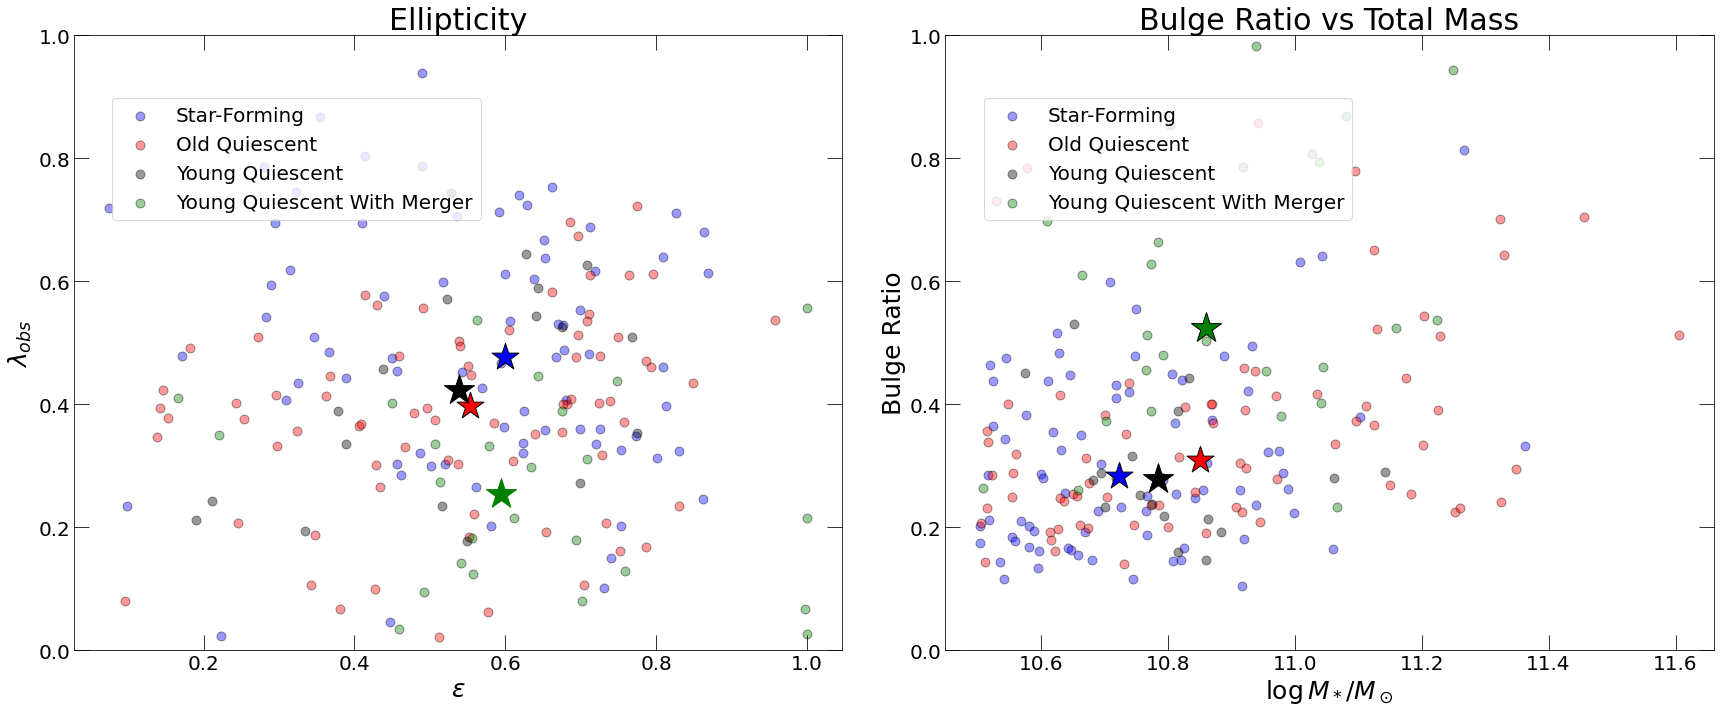

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
n_bins=50
redshift=2

#select young quiescent galaxies by merger cut-off
# had a significant prior merger 
PSB = (maximum_merger_ratio_30kpc_current_fraction>=0.1) & PSB_selection 
# had no significant prior merger
PSBm = (maximum_merger_ratio_30kpc_current_fraction<0.1) & PSB_selection 

#panel 1: young quiescent galaxies with mergers
ax1.scatter(ellipticity[subselection], lambda_obs[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax1.scatter((ellipticity[old_quiescent_selection]), lambda_obs[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax1.scatter((ellipticity[PSBm]), lambda_obs[PSBm], c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax1.scatter((ellipticity[PSB]), lambda_obs[PSB], c='g', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent With Merger')
ax1.scatter(np.median(ellipticity[subselection]), np.median(lambda_obs[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(ellipticity[old_quiescent_selection]), np.median(lambda_obs[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax1.scatter(np.median(ellipticity[PSBm]), np.median(lambda_obs[PSBm]), c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax1.scatter(np.median(ellipticity[PSB]), np.median(lambda_obs[PSB]), c='green', s=1000, edgecolors='green', marker='*', lw=1)

ax1.legend(loc=(0.05, 0.7), fontsize=20, frameon=True)
ax1.set_ylim(0, 1)
#ax1.set_xlim(10.45, 11.7)
ax1.set_xlabel('$\epsilon$', fontsize=25)
ax1.set_ylabel('$\lambda_{obs}$', fontsize=25)
ax1.set_yscale('linear')
ax1.set_title('Ellipticity', fontsize=30)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

#panel 2: young quiescent galaxies without mergers
ax2.scatter(total_mass[subselection], bulge_ratio[subselection], c='blue', s=80, alpha = 0.4, edgecolors='k', label='Star-Forming')
ax2.scatter((total_mass[old_quiescent_selection]), bulge_ratio[old_quiescent_selection], c='red', s=80, alpha = 0.4, edgecolors='k', label='Old Quiescent')
ax2.scatter((total_mass[PSBm]), bulge_ratio[PSBm], c='k', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent')
ax2.scatter((total_mass[PSB]), bulge_ratio[PSB], c='g', s=80, alpha=0.4, edgecolors='k', label='Young Quiescent With Merger')
ax2.scatter(np.median(total_mass[subselection]), np.median(bulge_ratio[subselection]), c='blue', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[old_quiescent_selection]), np.median(bulge_ratio[old_quiescent_selection]), c='red', edgecolors='k', s=800, marker='*', lw=1)
ax2.scatter(np.median(total_mass[PSBm]), np.median(bulge_ratio[PSBm]), c='black', s=1000, edgecolors='black', marker='*', lw=1)
ax2.scatter(np.median(total_mass[PSB]), np.median(bulge_ratio[PSB]), c='green', s=1000, edgecolors='black', marker='*', lw=1)
ax2.legend(loc=(0.05, 0.7), fontsize=20, frameon=True)
ax2.set_ylim(0, 1)
ax2.set_xlabel('$\log \, M_*/M_\odot$', fontsize=25)
ax2.set_ylabel('Bulge Ratio', fontsize=25)
ax2.set_yscale('linear')
ax2.set_title('Bulge Ratio vs Total Mass', fontsize=30)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=7)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

f.tight_layout(w_pad=4, h_pad=10)

plt.savefig("Merger_plot.png",dpi=200)